<a href="https://colab.research.google.com/github/sekwangoh/BR/blob/master/n123a_confidence_intervals_ipynb%E1%84%8B%E1%85%B4_%E1%84%89%E1%85%A1%E1%84%87%E1%85%A9%E1%86%AB_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src='https://i.imgur.com/RDAD11M.png' width = '200' align = 'right'>

## *DATA SCIENCE / SECTION 1 / SPRINT 2 / NOTE 3*

# 📝 Assignment

# 신뢰구간


# 중심극한정리 


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

sample_means = []

for x in range(0, 3000):
    coinflips = np.random.binomial(n=1, p=0.5, size=12) 
    one_sample = coinflips
    sample_means.append(coinflips.mean())
print(len(sample_means))
print(pd.DataFrame(sample_means).describe())

3000
                 0
count  3000.000000
mean      0.501861
std       0.144662
min       0.083333
25%       0.416667
50%       0.500000
75%       0.583333
max       0.916667


In [ ]:
df = pd.DataFrame({'single_sample': one_sample})
print(len(df))
print(df)
df.head()

12
    single_sample
0               0
1               0
2               1
3               1
4               0
5               1
6               1
7               1
8               0
9               1
10              0
11              0


,single_sample
0,0
1,0
2,1
3,1
4,0


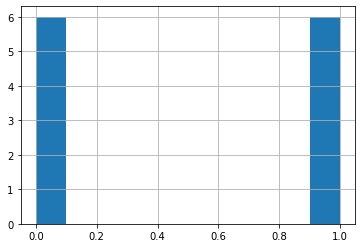

In [ ]:
df.single_sample.hist();

Text(0.5, 1.0, 'Distribution of 3000 sample means \n (of 12 coinflips each)')

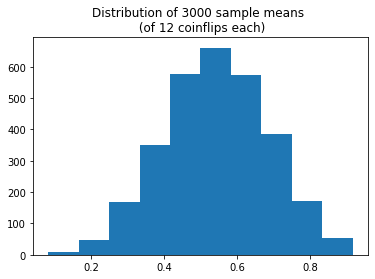

In [ ]:
ax = plt.hist(sample_means)
plt.title('Distribution of 3000 sample means \n (of 12 coinflips each)')

In [ ]:
sample_means_small = []
sample_means_medium = []
sample_means_large = []

for x in range(0, 3000):
    coinflips_small = np.random.binomial(n=1, p=.5, size=20)
    coinflips_medium = np.random.binomial(n=1, p=.5, size=50)
    coinflips_large = np.random.binomial(n=1, p=.5, size=100)
    one_small_sample = coinflips_small
    one_small_sample = coinflips_medium
    one_large_sample = coinflips_large
    sample_means_small.append(coinflips_small.mean())
    sample_means_medium.append(coinflips_medium.mean())
    sample_means_large.append(coinflips_large.mean())
print(len(sample_means_small))
print(sample_means_small[0:10])

3000
[0.55, 0.5, 0.45, 0.45, 0.6, 0.45, 0.65, 0.4, 0.45, 0.65]


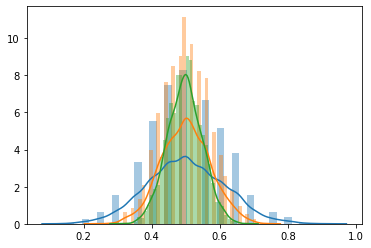

In [ ]:
import seaborn as sns
fix, ax = plt.subplots()
for sample in [sample_means_small, sample_means_medium ,sample_means_large]:
    sns.distplot(sample)

In [ ]:
from scipy import stats

def confidence_interval(data, confidence=0.95):
    data = np.array(data)
    mean = np.mean(data)
    n = len(data)
    stderr = stats.sem(data)

    interval = stderr * stats.t.ppf((1 + confidence) / 2.0, n - 1)
    return(mean, mean - interval, mean + interval)

confidence_interval([1,2,3,1,2,3,1,2,3])


(2.0, 1.3343139459430469, 2.665686054056953)

# 신뢰구간 시각화



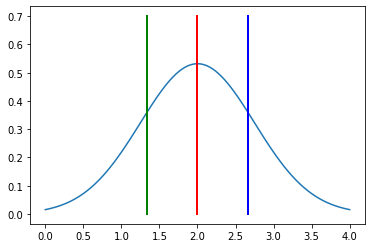

In [ ]:
x = np.linspace(0,4,101)
y = stats.norm(2, 0.75).pdf(x)

plt.plot(x,y)

plt.plot([2,2], [0,0.7], 'k-', lw =2, color = 'red')
plt.plot([1.3343139459430469, 1.3343139459430469], [0,0.7], 'k-', lw =2, color = 'green')
plt.plot([2.665686054056953, 2.665686054056953], [0,0.7], 'k-', lw =2, color = 'blue')

In [ ]:
from scipy.stats import t, ttest_1samp

In [ ]:
import numpy as np
coinflips_means = []
for x in range(0,100):
  coinflips = np.random.binomial(n=1, p=.5, size=30)
  coinflips_means.append(coinflips.mean())

In [ ]:
n = len(coinflips_means)
dof = n -1
mean = np.mean(coinflips_means)
sample_std = np.std(coinflips_means, ddof=1)
std_err = sample_std/n**.5

CI =t.interval(.95, dof, loc = mean, scale = std_err)
print("95% 신뢰구간:", CI)

95% 신뢰구간: (0.47752729972615476, 0.5158060336071785)



서울시 기간별 시간평균 대기환경 정보 데이터셋을 이용합니다.

<img src='https://user-images.githubusercontent.com/6457691/89852263-740add80-dbc9-11ea-9e6b-8059b3f7e479.png'>

<https://data.seoul.go.kr/dataList/OA-2221/S/1/datasetView.do>

## 사이즈가 너무 크기 때문에 모든 데이터셋을 사용하지 않으며, 특정 한달동안의, 특정 지역만의 데이터만을 사용하세요.

## 1단계 - 준비

**1) 데이터셋 불러오기**

**2) 데이터셋에서 임의의 2 샘플을 선택하세요, 1개는 20개의 데이터, 다른 1개는 200개의 데이터이며, 매 시행마다 동일한 결과물을 위해 `42`를 `random_state`로 사용합니다.**

In [ ]:
## 2) 데이터셋에서 임의의 2 샘플을 선택하세요, 1개는 20개의 데이터, 다른 1개는 200개의 데이터이며, 매 시행마다 동일한 결과물을 위해 `42`를 `random_state`로 사용합니다.**
%mv /Users/ohsekwang/jupyter tutorial/code states/dataset/서울시_기간별_시간평균_대기환경_정보_2020.04.csv

usage: mv [-f | -i | -n] [-v] source target
       mv [-f | -i | -n] [-v] source ... directory


In [ ]:
%cd dataset
%pwd

[Errno 2] No such file or directory: 'dataset'
/Users/ohsekwang/jupyter tutorial/code states/dataset


'/Users/ohsekwang/jupyter tutorial/code states/dataset'

In [ ]:
%ls

서울시_기간별_시간평균_대기환경_정보_2020.04.csv


In [ ]:
import pandas as pd
df = pd.read_csv("서울시_기간별_시간평균_대기환경_정보_2020.04.csv", encoding="cp949")
df

,측정일시,권역코드,권역명,측정소코드,측정소명,미세먼지 1시간(㎍/㎥),미세먼지 24시간(㎍/㎥),초미세먼지(㎍/㎥),오존(ppm),이산화질소농도(ppm),일산화탄소농도(ppm),아황산가스농도(ppm)
0,202004302300,100,도심권,111123,종로구,40,43,21,0.036,0.008,0.3,0.003
1,202004302300,100,도심권,111121,중구,31,41,22,0.037,0.010,0.3,0.003
2,202004302300,100,도심권,111131,용산구,41,40,21,0.035,0.011,0.3,0.002
3,202004302300,101,서북권,111181,은평구,32,37,20,0.053,0.005,0.3,0.003
4,202004302300,101,서북권,111201,마포구,34,34,21,0.043,0.009,0.3,0.002
...,...,...,...,...,...,...,...,...,...,...,...,...
17995,202004010000,103,서남권,111301,양천구,52,48,25,0.026,0.030,0.5,0.005
17996,202004010000,104,동남권,111273,송파구,51,48,22,0.020,0.041,0.6,0.003
17997,202004010000,104,동남권,111261,강남구,44,43,25,0.025,0.038,0.5,0.003
17998,202004010000,104,동남권,111274,강동구,51,49,23,0.018,0.040,0.5,0.004


In [ ]:
#데이터 filter
import numpy as np
import matplotlib.pyplot as plt

condition1 = ((df['측정소명'] == '강남구'))
df_select1 = df[condition1]
display(df_select1)



# condition2 = ((df['측정소명'] == '서초구'))
# df_select2 = df[condition2]
# display(df_select2)

np.random.seed(42)

,측정일시,권역코드,권역명,측정소코드,측정소명,미세먼지 1시간(㎍/㎥),미세먼지 24시간(㎍/㎥),초미세먼지(㎍/㎥),오존(ppm),이산화질소농도(ppm),일산화탄소농도(ppm),아황산가스농도(ppm)
22,202004302300,104,동남권,111261,강남구,32,34,23,0.046,0.008,0.4,0.002
46,202004302200,104,동남권,111261,강남구,34,34,21,0.045,0.008,0.4,0.002
74,202004302100,104,동남권,111261,강남구,37,33,24,0.043,0.009,0.4,0.002
96,202004302000,104,동남권,111261,강남구,35,33,22,0.045,0.012,0.4,0.002
121,202004301900,104,동남권,111261,강남구,36,33,22,0.051,0.014,0.4,0.002
...,...,...,...,...,...,...,...,...,...,...,...,...
17896,202004010400,104,동남권,111261,강남구,58,53,34,0.038,0.025,0.6,0.004
17922,202004010300,104,동남권,111261,강남구,54,51,30,0.032,0.025,0.5,0.003
17947,202004010200,104,동남권,111261,강남구,50,50,27,0.034,0.024,0.5,0.004
17974,202004010100,104,동남권,111261,강남구,49,49,25,0.029,0.031,0.5,0.003


**3) 두 샘플데이터에 대해서 `오존(ppm)`항목의 표본 평균을 계산하세요.**

In [ ]:
#전체 데이터의 mean값
df_total = df_select1
df_total_data = df_total['오존(ppm)'].mean()
display(df_total_data)


# 20개 데이터
df_sample1 = df_select1[0:10]
df_sample1_data = df_sample1['오존(ppm)']


# 200개 데이터
df_sample2 = df_select1[100:300]
df_sample2_data = df_sample2['오존(ppm)']
display(df_sample2_data)

from scipy import stats

display(df_sample1['오존(ppm)'].mean())
display(df_sample2['오존(ppm)'].mean())


0.037797222222222183

2522    0.053
2546    0.051
2573    0.050
2597    0.051
2623    0.052
        ...  
7399    0.051
7421    0.051
7446    0.048
7471    0.044
7499    0.037
Name: 오존(ppm), Length: 200, dtype: float64

0.058699999999999995

0.03775499999999999

**4) 모든 샘플 평균은 각각 데이터로 부터 나온 추정값입니다. 모집단의 평균을 추정할때의 어느 샘플 평균 값을 더 신뢰하게 될까요?**

In [ ]:
### 상대적으로 샘플의 수가 많은 df_sample2(200개 데이터)를 더 신뢰하게 됩니다. 그 이유는 샘플의 수가 많을수록 모집단의 평균에 근사치로 측정할 수 있습니다. 


**5) 모집단의 평균에 대한 추정을 하세요.**

In [ ]:
from scipy import stats
def confidence_interval(data, confidence=0.95):
    
    data = np.array(data)
    mean = np.mean(data)
    n = len(data)
    stderr = stats.sem(data)
    interval = stderr / stats.t.ppf((1 + confidence)/2.0, n-1)
    return(mean - interval, mean, mean + interval)


confidence_interval(df_sample2_data)

NameError: name 'stderr' is not defined

**6) 추정치에 대한 오차에 대해서 설명해보세요.**


In [ ]:
confidence_interval(df_sample1_data)
샘플 수가 적을수록 신뢰구간의 넓어지고, 추정치에 대한 오차범위도 넓어집니다. 그로 인해 error의 값도 커집니다.


(0.056764073131315006, 0.058699999999999995, 0.060635926868684985)

## 2단계 - 신뢰구간과, 표본 오차를 추정된 값과 같이 설명.

**1) 1단계에서 추정한 값들을 바탕으로, 95%에 해당하는 신뢰구간을 계산하세요.**

In [ ]:
# 20개 데이터 신뢰구간
display(confidence_interval(df_sample1_data))
# 200개 데이터 신뢰구간 
display(confidence_interval(df_sample2_data))


(0.056764073131315006, 0.058699999999999995, 0.060635926868684985)

(0.037284745651275264, 0.037755000000000004, 0.038225254348724744)

**2) 두 샘플에 대한 신뢰구간중 어느것이 더 넓으며, 왜 그렇습니까?**

(첫번째 (샘플수 20)의 신뢰구간이 더 넓으며, 이는 error 의 값이 훨씬 더 크기 때문입니다.) 

**3) 두 샘플에 대해, 추정된 평균과, 표본 오차의 값을 설명하세요. 표본 오차가 의미 하는 바는 무엇인가요?**

In [ ]:
# 모집단의 평균밧
display(df_total_data)
# 200개 데이터 표본 추정된 평균값
display(ddf_sample2_data)

표본오차(sampling error) : 모집단과 표본이 완벽하게 일치되지 않기 때문에, 
자연적으로 발생하는 불일치, 에러의 양들을 말한다. 모집단과 표본 사이에 나타나는 오차이다. 


0.037797222222222183

0.03775499999999999

표본 오차는, 추정된 값이 실제 값과 얼마나 멀리 떨어져 있을 수 있는지 (95%의 확률로)를 의미합니다. 

## 3단계 - 시각화하기

**1) `plt.errorbar` 를 사용하여 계산된 신뢰구간을 시각화하세요.** 

(0.056764073131315006, 0.058699999999999995, 0.060635926868684985)

(0.037284745651275264, 0.037755000000000004, 0.038225254348724744)

0.000927321140429483

ValueError: The lengths of the data (2) and the error 1 do not match

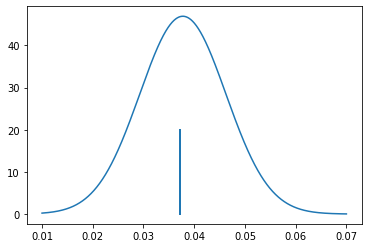

In [ ]:
# 20개 데이터 신뢰구간
display(confidence_interval(df_sample1_data))
# 200개 데이터 신뢰구간 
display(confidence_interval(df_sample2_data))
display(stats.sem(df_sample2_data))

x = np.linspace(0.01, 0.07, 10000)
y = stats.norm(0.037755, 0.0085).pdf(x)

plt.errorbar(x,y)

plt.errorbar([0.03728,0.03728], [0,20], 'k-', lw = 2, ecolor = 'green')
plt.errorbar([0.03775,0.03775], [0,20], 'k-', lw = 2, ecolor = 'red')
plt.errorbar([0.03822,0.03822], [0,20], 'k-', lw = 2, color = 'blue')

**2) `plt.bar`를 사용하여 신뢰구간을 비교하세요.**

In [ ]:
# 20개 데이터 신뢰구간
display(confidence_interval(df_sample1_data))
# 200개 데이터 신뢰구간 
display(confidence_interval(df_sample2_data))
display(stats.sem(df_sample2_data))

x = np.linspace(0.01, 0.07, 10000)
y = stats.norm(0.037755, 0.0085).pdf(x)

plt.bar(x,y)

plt.bar([0.03728,0.03728], [0,20], 'k-', lw = 2, ecolor = 'green')
plt.bar([0.03775,0.03775], [0,20], 'k-', lw = 2, ecolor = 'red')
plt.bar([0.03822,0.03822], [0,20], 'k-', lw = 2, color = 'blue')

## 4단계 - 실제와의 비교

**200, 20개의 샘플 데이터가 아닌 전체 데이터에 대해서 평균을 계산하고 추측된 평균값과의 비교를 해보세요.**

In [ ]:
# 모집단의 평균값
display(df_total_data)
# 200개 데이터 표본 추정된 평균값
display(df_sample2['오존(ppm)'].mean())
#20개 데이터 표본 추정된 평균값
display(df_sample1['오존(ppm)'].mean())

0.037797222222222183

0.03775499999999999

0.058699999999999995

# 🔥 도전과제:

matplotlib는 좋은 시각화 라이브러리이지만, 유일한 시각화 라이브러리는 아닙니다.

[plotly](https://plotly.com/) 나 [seaborn](http://seaborn.pydata.org/index.html), [bokeh](https://docs.bokeh.org/en/latest/index.html) 등 다른 시각화 라이브러리를 선택하여 앞에서 그렸던 신뢰구간을 해당 라이브러리를 선택하여 그려보세요.